In [66]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pandas import DataFrame
import numpy as np

import seaborn as sns



from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.callbacks import EarlyStopping
from keras import initializers

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.show()


from datetime import datetime, timedelta

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

from scipy import stats

from itertools import product

from math import sqrt

from random import randint

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline

# DATA REPRESENTATION

In [71]:
file_name ="C:/Users/prateek raj/Desktop/VIT/8th Semester/HV/Datasets/bitcoin_dataset.csv"

In [72]:
color = sns.color_palette()
df = pd.read_csv(file_name,parse_dates=['Date'])
df = df.iloc[::-1]
df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))

In [73]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Date_mpl
2919,2018-02-20,11390.391667,16876825.0,1.922336e+11,1.258473e+09,157664.996336,1.010840,0.0,1407.482270,8.466667,...,104.157082,455116.0,198455.0,300576632.0,191891.0,139951.0,1.268018e+06,130404.455959,1.485358e+09,17582.0
2918,2018-02-19,11110.965000,16875062.5,1.874982e+11,1.020589e+09,157522.467859,1.006584,0.0,1156.586420,8.416667,...,123.102480,436341.0,187367.0,300378177.0,181922.0,135051.0,1.789526e+06,103474.270242,1.149699e+09,17581.0
2917,2018-02-18,10503.298333,16873037.5,1.772225e+11,1.377347e+09,157359.401239,0.972767,0.0,984.537037,6.966667,...,136.289229,378869.0,159495.0,300190810.0,153951.0,113528.0,1.639024e+06,79660.081975,8.366936e+08,17580.0
2916,2018-02-17,10841.991667,16871012.5,1.829154e+11,9.735543e+08,157201.813038,0.973017,0.0,1166.369128,7.933333,...,119.228205,401860.0,173789.0,300031315.0,167847.0,122775.0,1.473900e+06,80893.896177,8.770509e+08,17579.0
2915,2018-02-16,10127.161667,16869150.0,1.708366e+11,8.665020e+08,157056.833478,0.989634,0.0,1195.783439,6.616667,...,109.005818,422415.0,187738.0,299857526.0,180685.0,126413.0,1.102896e+06,106729.749001,1.080869e+09,17578.0


AttributeError: module 'seaborn' has no attribute 'tsplot'

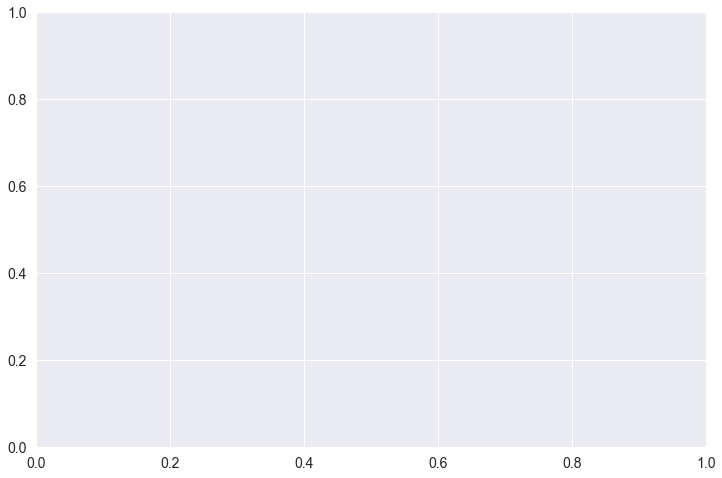

In [74]:
#closing price
fig, ax = plt.subplots(figsize=(12,8))
sns.tsplot(df.Close.values, time=df.Date_mpl.values, alpha=0.8, color=color[1], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price in USD', fontsize=12)
plt.title("Closing price distribution of bitcoin", fontsize=10)
plt.show()

AttributeError: module 'seaborn' has no attribute 'tsplot'

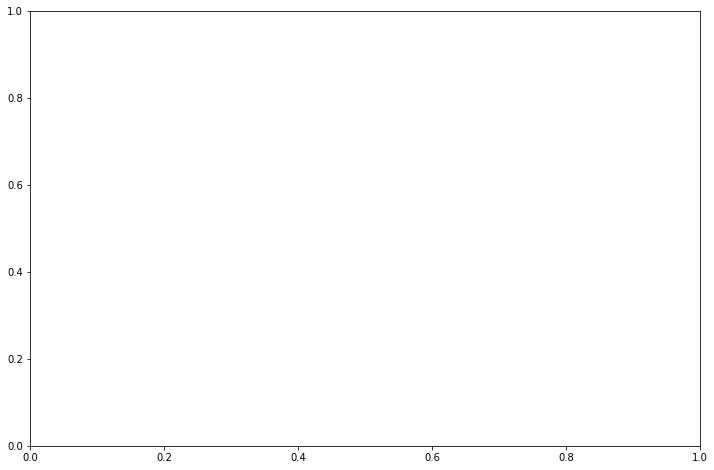

In [13]:
#opening price
fig, ax = plt.subplots(figsize=(12,8))
sns.tsplot(df.Open.values, time=df.Date_mpl.values, alpha=0.8, color=color[5], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Opening Price in USD', fontsize=12)
plt.title("Opening price distribution of bitcoin", fontsize=15)
plt.show()

# LINEAR REGRESSION

In [14]:
df = pd.read_csv("C:/Users/prateek raj/Desktop/VIT/8th Semester/HV/Datasets/bitcoin_cash_price.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",1543.27,1569.03,1414.35,1418.73,"820,947,000","26,199,800,000"
1,"Feb 19, 2018",1483.34,1553.81,1483.34,1534.77,"578,906,000","25,179,700,000"
2,"Feb 18, 2018",1552.10,1641.40,1428.49,1487.46,"907,873,000","26,344,200,000"
3,"Feb 17, 2018",1548.48,1568.64,1517.14,1551.39,"641,719,000","26,280,100,000"
4,"Feb 16, 2018",1373.16,1558.66,1369.68,1552.20,"961,010,000","23,302,000,000"


In [15]:
df = df.iloc[::-1]

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
212,"Jul 23, 2017",555.89,578.97,411.78,413.06,"85,013",-
211,"Jul 24, 2017",412.58,578.89,409.21,440.70,"190,952",-
210,"Jul 25, 2017",441.35,541.66,338.09,406.90,"524,908",-
209,"Jul 26, 2017",407.08,486.16,321.79,365.82,"1,784,640",-
208,"Jul 27, 2017",417.10,460.97,367.78,385.48,"533,207",-


In [17]:
y = df["Close"]
y = y.values.reshape(-1, 1)
y

array([[ 413.06],
       [ 440.7 ],
       [ 406.9 ],
       [ 365.82],
       [ 385.48],
       [ 406.05],
       [ 384.77],
       [ 345.66],
       [ 294.46],
       [ 380.01],
       [ 452.66],
       [ 364.05],
       [ 233.05],
       [ 213.15],
       [ 220.66],
       [ 319.69],
       [ 345.49],
       [ 303.89],
       [ 275.95],
       [ 328.24],
       [ 317.09],
       [ 298.05],
       [ 297.68],
       [ 297.86],
       [ 300.21],
       [ 460.53],
       [ 690.24],
       [ 754.56],
       [ 712.87],
       [ 599.63],
       [ 690.88],
       [ 669.4 ],
       [ 628.11],
       [ 641.05],
       [ 625.32],
       [ 620.9 ],
       [ 596.18],
       [ 552.93],
       [ 575.21],
       [ 588.17],
       [ 622.17],
       [ 575.9 ],
       [ 607.43],
       [ 517.24],
       [ 541.71],
       [ 638.18],
       [ 652.86],
       [ 583.1 ],
       [ 547.47],
       [ 537.07],
       [ 537.81],
       [ 510.41],
       [ 503.61],
       [ 367.04],
       [ 424.02],
       [ 4

In [18]:
x = df["Open"]
x = x.values.reshape(-1, 1)
x

array([[ 555.89],
       [ 412.58],
       [ 441.35],
       [ 407.08],
       [ 417.1 ],
       [ 386.65],
       [ 410.56],
       [ 385.14],
       [ 346.36],
       [ 294.6 ],
       [ 382.38],
       [ 448.49],
       [ 362.18],
       [ 231.11],
       [ 212.18],
       [ 223.76],
       [ 321.35],
       [ 345.28],
       [ 305.21],
       [ 275.88],
       [ 327.82],
       [ 316.29],
       [ 296.1 ],
       [ 298.19],
       [ 297.97],
       [ 301.02],
       [ 458.67],
       [ 697.04],
       [ 772.42],
       [ 723.7 ],
       [ 596.19],
       [ 690.96],
       [ 670.03],
       [ 627.06],
       [ 641.88],
       [ 625.89],
       [ 619.7 ],
       [ 596.13],
       [ 549.32],
       [ 576.25],
       [ 588.4 ],
       [ 621.96],
       [ 578.27],
       [ 608.26],
       [ 514.9 ],
       [ 541.28],
       [ 636.85],
       [ 654.37],
       [ 584.73],
       [ 546.48],
       [ 537.19],
       [ 539.03],
       [ 509.47],
       [ 504.22],
       [ 369.49],
       [ 4

In [19]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(170, 1) (170, 1)
(43, 1) (43, 1)


In [20]:
y_test.shape

(43, 1)

In [21]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [22]:
predictions[0:5]

array([[2368.15532954],
       [1296.90754712],
       [ 636.23269586],
       [ 346.30648024],
       [2740.8508035 ]])

In [23]:
predictions.shape

(43, 1)

In [24]:
y_test.shape

(43, 1)

Text(0, 0.5, 'Predictions')

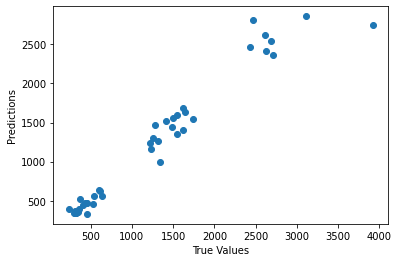

In [25]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [26]:
print("Score:", model.score(X_test, y_test))

Score: 0.9409718569080859


In [27]:
# Perform 6-fold cross validation
scores = cross_val_score(model, x, y, cv=6)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.75556888 0.51513303 0.88979746 0.64317579 0.39890808 0.76145938]


Text(0, 0.5, 'Predictions')

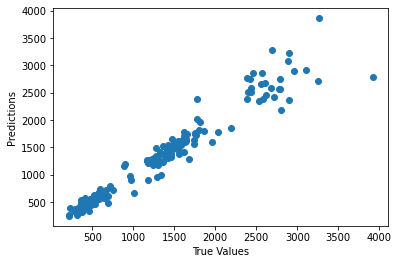

In [28]:
# Make cross validated predictions
predictions1 = cross_val_predict(model, x, y, cv=6)
plt.scatter(y, predictions1)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [29]:
predictions1.shape

(213, 1)

In [30]:
accuracy = metrics.r2_score(y, predictions1)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.9555607839331259


In [31]:
rmse_lr=sqrt(mean_squared_error(y_test, predictions))
#rmse_lr

# SUPPORT VECTOR REGRESSION

In [32]:
model = SVC(gamma='auto')
svmmodel=svm.SVR(kernel='poly', C=1, degree=1)
model = svmmodel.fit(X_train, y_train.ravel())
predictions = svmmodel.predict(X_test)

In [33]:
predictions[0:5]

array([ 957.9521223 ,  770.99889834,  655.69850243,  605.10083342,
       1022.99460971])

In [34]:
predictions.shape

(43,)

Text(0, 0.5, 'Predictions')

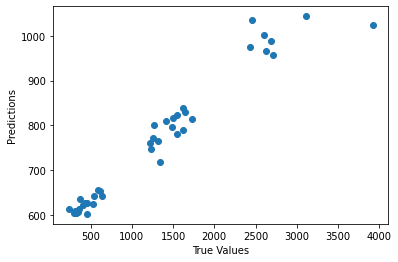

In [35]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [36]:
print("Score:", model.score(X_test, y_test))

Score: 0.014846145736291172


In [37]:
scores = cross_val_score(model, x, y, cv=6)
print('Cross-validated scores:', scores)

Cross-validated scores: [-18.20395698 -66.5253815  -42.43766683  -6.2942874   -8.71745244
  -7.83899236]


Text(0, 0.5, 'Predictions')

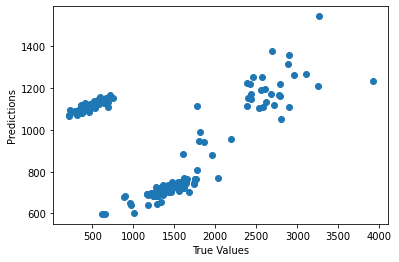

In [38]:
predictions1 = cross_val_predict(model, x, y, cv=6)
plt.scatter(y, predictions1)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [39]:
accuracy = metrics.r2_score(y, predictions1)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: -0.12599326719525128


In [40]:
rmse_svr=sqrt(mean_squared_error(y_test, predictions))

# ARIMA

In [41]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

colors = ["windows blue", "amber", "faded green", "dusty purple"]
sns.set(rc={"figure.figsize": (20,10), "axes.titlesize" : 18, "axes.labelsize" : 12, 
            "xtick.labelsize" : 14, "ytick.labelsize" : 14 })

In [47]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%b %d, %Y')
df = pd.read_csv('C:/Users/prateek raj/Desktop/VIT/8th Semester/HV/Datasets/bitcoin_dataset.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)
df = df.iloc[::-1]
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

ValueError: time data '2010-02-23 00:00:00' does not match format '%b %d, %Y'

In [43]:
df.sample(5)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-08-14,296.10,327.39,293.50,297.68,"174,968,000","4,882,720,000"
2017-09-12,539.03,559.22,505.01,510.41,"273,825,000","8,934,220,000"
2017-12-17,1812.33,1939.93,1806.65,1862.88,"1,020,590,000","30,554,500,000"
2017-08-03,448.49,519.28,364.05,364.05,"161,518,000","7,392,030,000"
2018-02-14,1229.18,1384.06,1229.18,1362.27,"629,852,000","20,854,300,000"


In [44]:
btc=df
btc.drop(['Volume', 'Market Cap'],axis=1,inplace=True) 

In [45]:
btc_month = btc.resample('M').mean()

In [46]:
seasonal_decompose(btc_month.Close, model='additive').plot()
decomposition = sm.tsa.seasonal_decompose(df, model = 'additive')
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [9.0,5.0]
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.Close)[1])

ValueError: x must have 2 complete cycles requires 24 observations. x only has 8 observation(s)

### timeseries is not stationary with 99.88% confidence

In [213]:
#Box-cox transformation
btc_month['close_box'], lmbda = stats.boxcox(btc_month.Close)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.close_box)[1])

Dickey–Fuller test: p=0.511886


### The p-value indicates that series is still not stationary.

In [214]:
# Seasonal differentiation (12 months)
btc_month['box_diff_seasonal_12'] = btc_month.close_box - btc_month.close_box.shift(12)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff_seasonal_12[12:])[1])

Dickey–Fuller test: p=0.665690


### The p-value indicates that series is still not stationary.

In [215]:
# Seasonal differentiation (3 months)
btc_month['box_diff_seasonal_3'] = btc_month.close_box - btc_month.close_box.shift(3)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff_seasonal_3[3:])[1])

Dickey–Fuller test: p=0.017885


### The p-value indicates that series is stationary as the computed p-value is lower than the significance level alpha = 0.05.

Dickey–Fuller test: p=0.002307


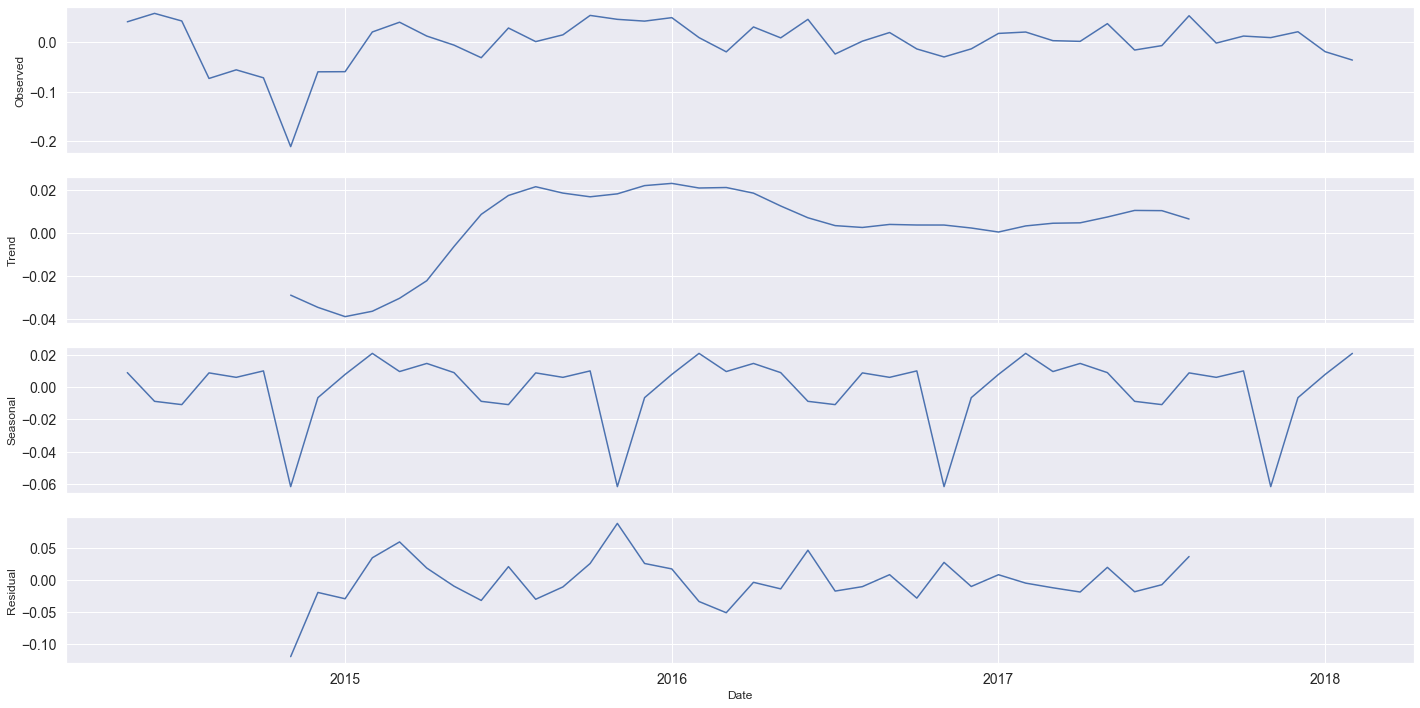

In [216]:
# Regular differentiation
btc_month['box_diff2'] = btc_month.box_diff_seasonal_12 - btc_month.box_diff_seasonal_12.shift(1)

# STL-decomposition
seasonal_decompose(btc_month.box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff2[13:])[1])

### The p-value indicates that series is stationary as the computed p-value is lower than the significance level alpha = 0.05.

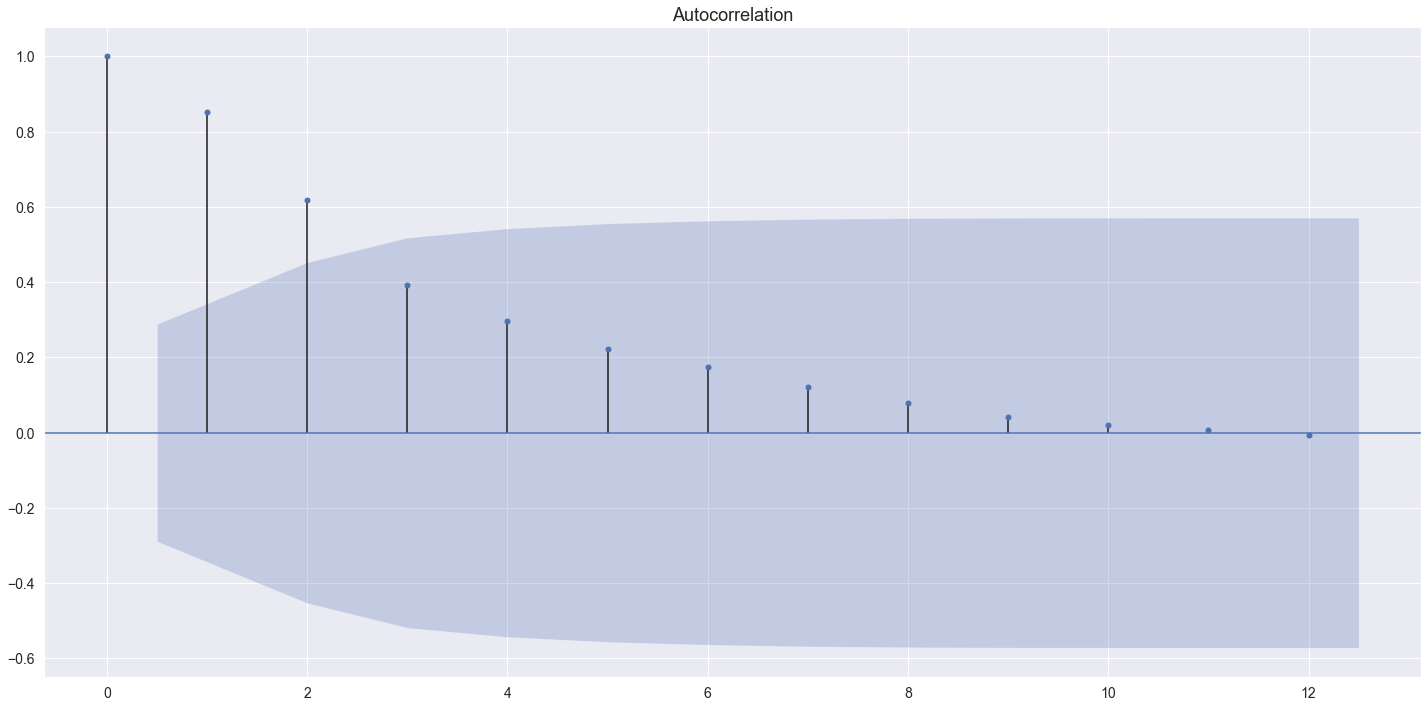

In [217]:
#autocorrelation_plot(btc_month.close)
plot_acf(btc_month.Close[13:].values.squeeze(), lags=12)
plt.tight_layout()

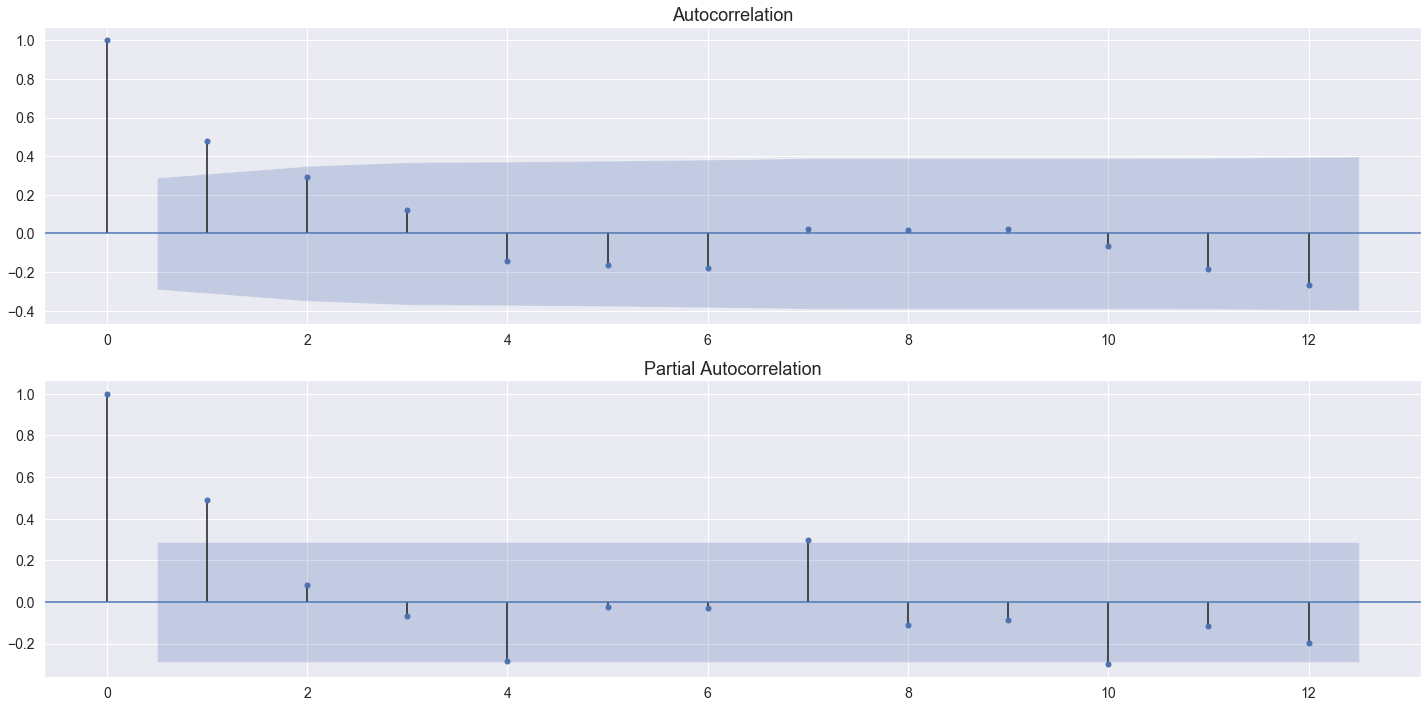

In [218]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
ax = plt.subplot(211)

plot_acf(btc_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
ax = plt.subplot(212)


plot_pacf(btc_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
plt.tight_layout()

### Monthly Forecasting 
#### ARIMA Model 

#### Parameter selection using AIC (Akaike Information Criterion) value 

In [220]:
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)


results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(btc_month.close_box, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [221]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters         aic
3     (1, 0) -221.089072
1     (0, 1) -220.707887
4     (1, 1) -219.129640
6     (2, 0) -219.119956
2     (0, 2) -218.906347


In [222]:
print(best_model.summary())

                           Statespace Model Results                           
Dep. Variable:              close_box   No. Observations:                   59
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 112.545
Date:                Wed, 27 May 2020   AIC                           -221.089
Time:                        02:37:38   BIC                           -216.968
Sample:                    04-30-2013   HQIC                          -219.484
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3738      0.151      2.471      0.013       0.077       0.670
sigma2         0.0012      0.000     11.241      0.000       0.001       0.001
Ljung-Box (Q):                       19.66   Jarque-

### Analysis of results 

In [223]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p=0.005727


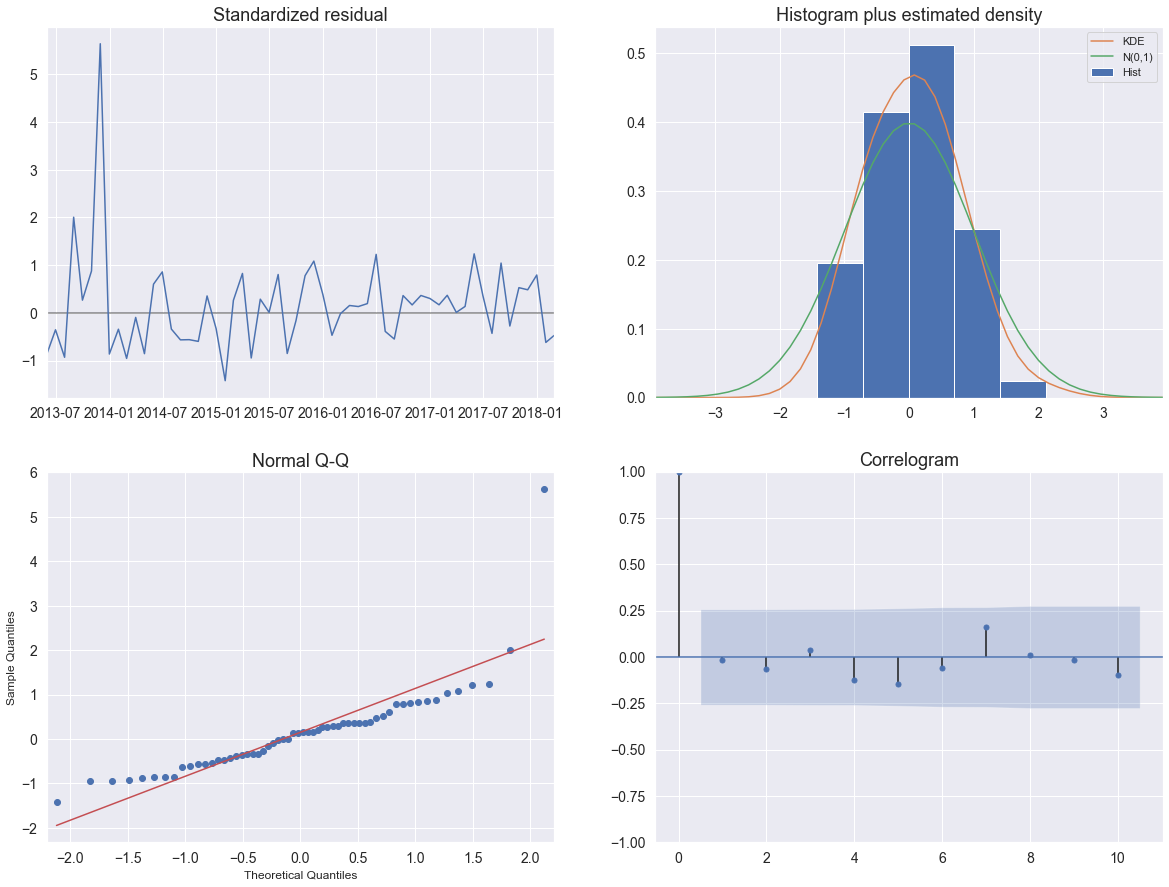

In [224]:
best_model.plot_diagnostics(figsize=(20, 15))
plt.show()

### Prediction

In [225]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

Text(0, 0.5, 'USD')

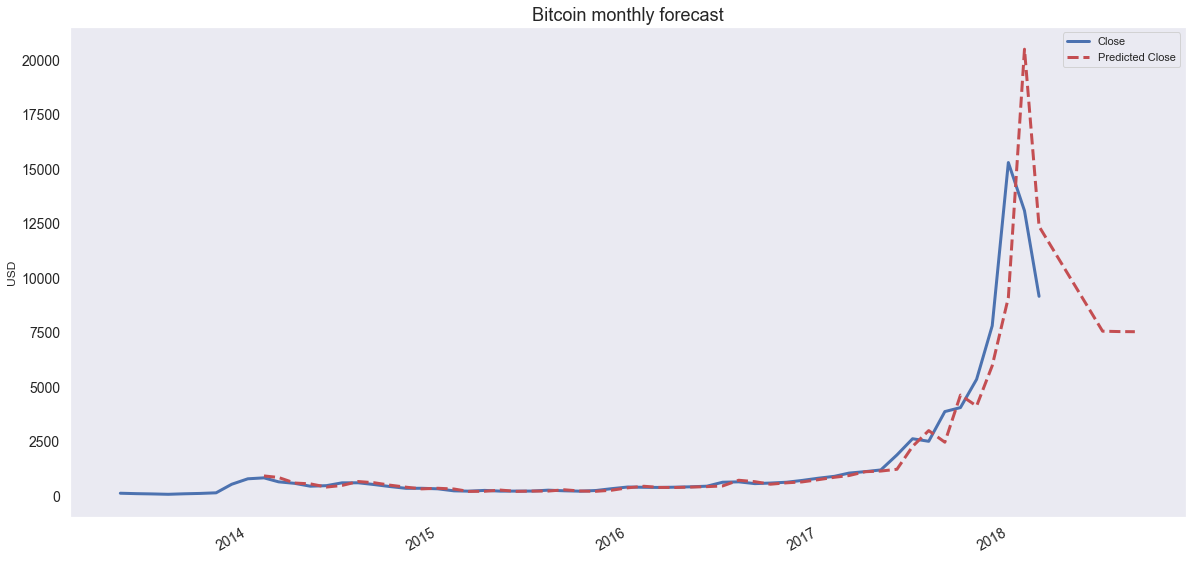

In [227]:
btc_month_pred = btc_month[['Close']]
date_list = [datetime(2018, 6, 30), datetime(2018, 7, 31), datetime(2018, 8, 31)]
future = pd.DataFrame(index=date_list, columns= btc_month.columns)
btc_month_pred = pd.concat([btc_month_pred, future])

#btc_month_pred['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
btc_month_pred['forecast'] = invboxcox(best_model.predict(start=datetime(2014, 1, 31), end=datetime(2018, 8, 31)), lmbda)

btc_month_pred.Close.plot(linewidth=3)
btc_month_pred.forecast.plot(color='r', ls='--', label='Predicted Close', linewidth=3)
plt.legend()
plt.grid()
plt.title('Bitcoin monthly forecast')
plt.ylabel('USD')

### Validation

In [228]:
btc_month_predict = btc_month['2015-01-01':'2017-01-01']

# Get a naive forecast
close_history = [x for x in btc_month_predict['Close']]
predictions = list()
for i in range(len(btc_month_predict)):
    # predict
    predictions.append(close_history[-1])
    # update observation
    close_history.append(btc_month_predict.iloc[i]['Close'])
    
# Calculate RMSE
rmse_arima = sqrt(mean_squared_error(btc_month_predict['Close'], predictions))
print('RMSE: %.2f' % rmse_arima)

RMSE: 131.54


# LSTM

In [229]:

dateparse = lambda dates: pd.datetime.strptime(dates, '%b %d, %Y')
for col in df.columns: 
    print(col) 
df = pd.read_csv('C:/Users/HP/Desktop/8TH Semester/Capstone/cryptocurrencypricehistory/bitcoin_price.csv', parse_dates=['Date'], date_parser=dateparse)
df.head()

Open
High
Low
Close


,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"


In [230]:
df=df.iloc[::-1]
for col in df.columns: 
    print(col) 

Date
Open
High
Low
Close
Volume
Market Cap


In [231]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
group = df.groupby('Date')
print(group)

In [232]:
Real_Price = group['Close'].mean()
df_train= Real_Price[:len(Real_Price)-50]
df_test= Real_Price[len(Real_Price)-50:]
Real_Price

Date
2013-04-28      134.21
2013-04-29      144.54
2013-04-30      139.00
2013-05-01      116.99
2013-05-02      105.21
2013-05-03       97.75
2013-05-04      112.50
2013-05-05      115.91
2013-05-06      112.30
2013-05-07      111.50
2013-05-08      113.57
2013-05-09      112.67
2013-05-10      117.20
2013-05-11      115.24
2013-05-12      115.00
2013-05-13      117.98
2013-05-14      111.50
2013-05-15      114.22
2013-05-16      118.76
2013-05-17      123.02
2013-05-18      123.50
2013-05-19      121.99
2013-05-20      122.00
2013-05-21      122.88
2013-05-22      123.89
2013-05-23      126.70
2013-05-24      133.20
2013-05-25      131.98
2013-05-26      133.48
2013-05-27      129.75
                ...   
2018-01-22    10931.40
2018-01-23    10868.40
2018-01-24    11359.40
2018-01-25    11259.40
2018-01-26    11171.40
2018-01-27    11440.70
2018-01-28    11786.30
2018-01-29    11296.40
2018-01-30    10106.30
2018-01-31    10221.10
2018-02-01     9170.54
2018-02-02     8830.75
2018-0

In [233]:
df_train

Date
2013-04-28      134.21
2013-04-29      144.54
2013-04-30      139.00
2013-05-01      116.99
2013-05-02      105.21
2013-05-03       97.75
2013-05-04      112.50
2013-05-05      115.91
2013-05-06      112.30
2013-05-07      111.50
2013-05-08      113.57
2013-05-09      112.67
2013-05-10      117.20
2013-05-11      115.24
2013-05-12      115.00
2013-05-13      117.98
2013-05-14      111.50
2013-05-15      114.22
2013-05-16      118.76
2013-05-17      123.02
2013-05-18      123.50
2013-05-19      121.99
2013-05-20      122.00
2013-05-21      122.88
2013-05-22      123.89
2013-05-23      126.70
2013-05-24      133.20
2013-05-25      131.98
2013-05-26      133.48
2013-05-27      129.75
                ...   
2017-12-03    11323.20
2017-12-04    11657.20
2017-12-05    11916.70
2017-12-06    14291.50
2017-12-07    17899.70
2017-12-08    16569.40
2017-12-09    15178.20
2017-12-10    15455.40
2017-12-11    16936.80
2017-12-12    17415.40
2017-12-13    16408.20
2017-12-14    16564.00
2017-1

In [234]:
df_test

Date
2018-01-02    14982.10
2018-01-03    15201.00
2018-01-04    15599.20
2018-01-05    17429.50
2018-01-06    17527.00
2018-01-07    16477.60
2018-01-08    15170.10
2018-01-09    14595.40
2018-01-10    14973.30
2018-01-11    13405.80
2018-01-12    13980.60
2018-01-13    14360.20
2018-01-14    13772.00
2018-01-15    13819.80
2018-01-16    11490.50
2018-01-17    11188.60
2018-01-18    11474.90
2018-01-19    11607.40
2018-01-20    12899.20
2018-01-21    11600.10
2018-01-22    10931.40
2018-01-23    10868.40
2018-01-24    11359.40
2018-01-25    11259.40
2018-01-26    11171.40
2018-01-27    11440.70
2018-01-28    11786.30
2018-01-29    11296.40
2018-01-30    10106.30
2018-01-31    10221.10
2018-02-01     9170.54
2018-02-02     8830.75
2018-02-03     9174.91
2018-02-04     8277.01
2018-02-05     6955.27
2018-02-06     7754.00
2018-02-07     7621.30
2018-02-08     8265.59
2018-02-09     8736.98
2018-02-10     8621.90
2018-02-11     8129.97
2018-02-12     8926.57
2018-02-13     8598.31
2018-0

In [235]:
#process data
training_set=df_train.values
training_set=np.reshape(training_set, (len(training_set), 1))
#df.head
training_set

array([[  134.21],
       [  144.54],
       [  139.  ],
       ...,
       [12952.2 ],
       [14156.4 ],
       [13657.2 ]])

In [236]:
sc=MinMaxScaler()
training_set=sc.fit_transform(training_set)
X_train= training_set[0:len(training_set)-1]
y_train= training_set[1:len(training_set)]
X_train

array([[0.00338567],
       [0.00391735],
       [0.0036322 ],
       ...,
       [0.7508257 ],
       [0.66312162],
       [0.72510123]])

In [237]:
y_train

array([[0.00391735],
       [0.0036322 ],
       [0.00249936],
       ...,
       [0.66312162],
       [0.72510123],
       [0.69940764]])

In [238]:
X_train= np.reshape(X_train, (len(X_train), 1, 1))

In [239]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
1709/1709 [==============================] - 7s 4ms/step - loss: 0.0140
Epoch 2/100
1709/1709 [==============================] - 1s 695us/step - loss: 0.0130
Epoch 3/100
1709/1709 [==============================] - 2s 970us/step - loss: 0.0120
Epoch 4/100
1709/1709 [==============================] - 1s 784us/step - loss: 0.0108
Epoch 5/100
1709/1709 [==============================] - 1s 781us/step - loss: 0.0095
Epoch 6/100
1709/1709 [==============================] - 1s 599us/step - loss: 0.0081
Epoch 7/100
1709/1709 [==============================] - 1s 740us/step - loss: 0.0066
Epoch 8/100
1709/1709 [==============================] - 1s 700us/step - loss: 0.0052
Epoch 9/100
1709/1709 [==============================] - 1s 667us/step - loss: 0.0039
Epoch 10/100
1709/1709 [==============================] - 1s 732us/step - loss: 0.0027
Epoch 11/100
1709/1709 [==============================] - 1s 622us/step - loss: 0.0017
Epoch 12/100
1709/1709 [==============================

In [240]:
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

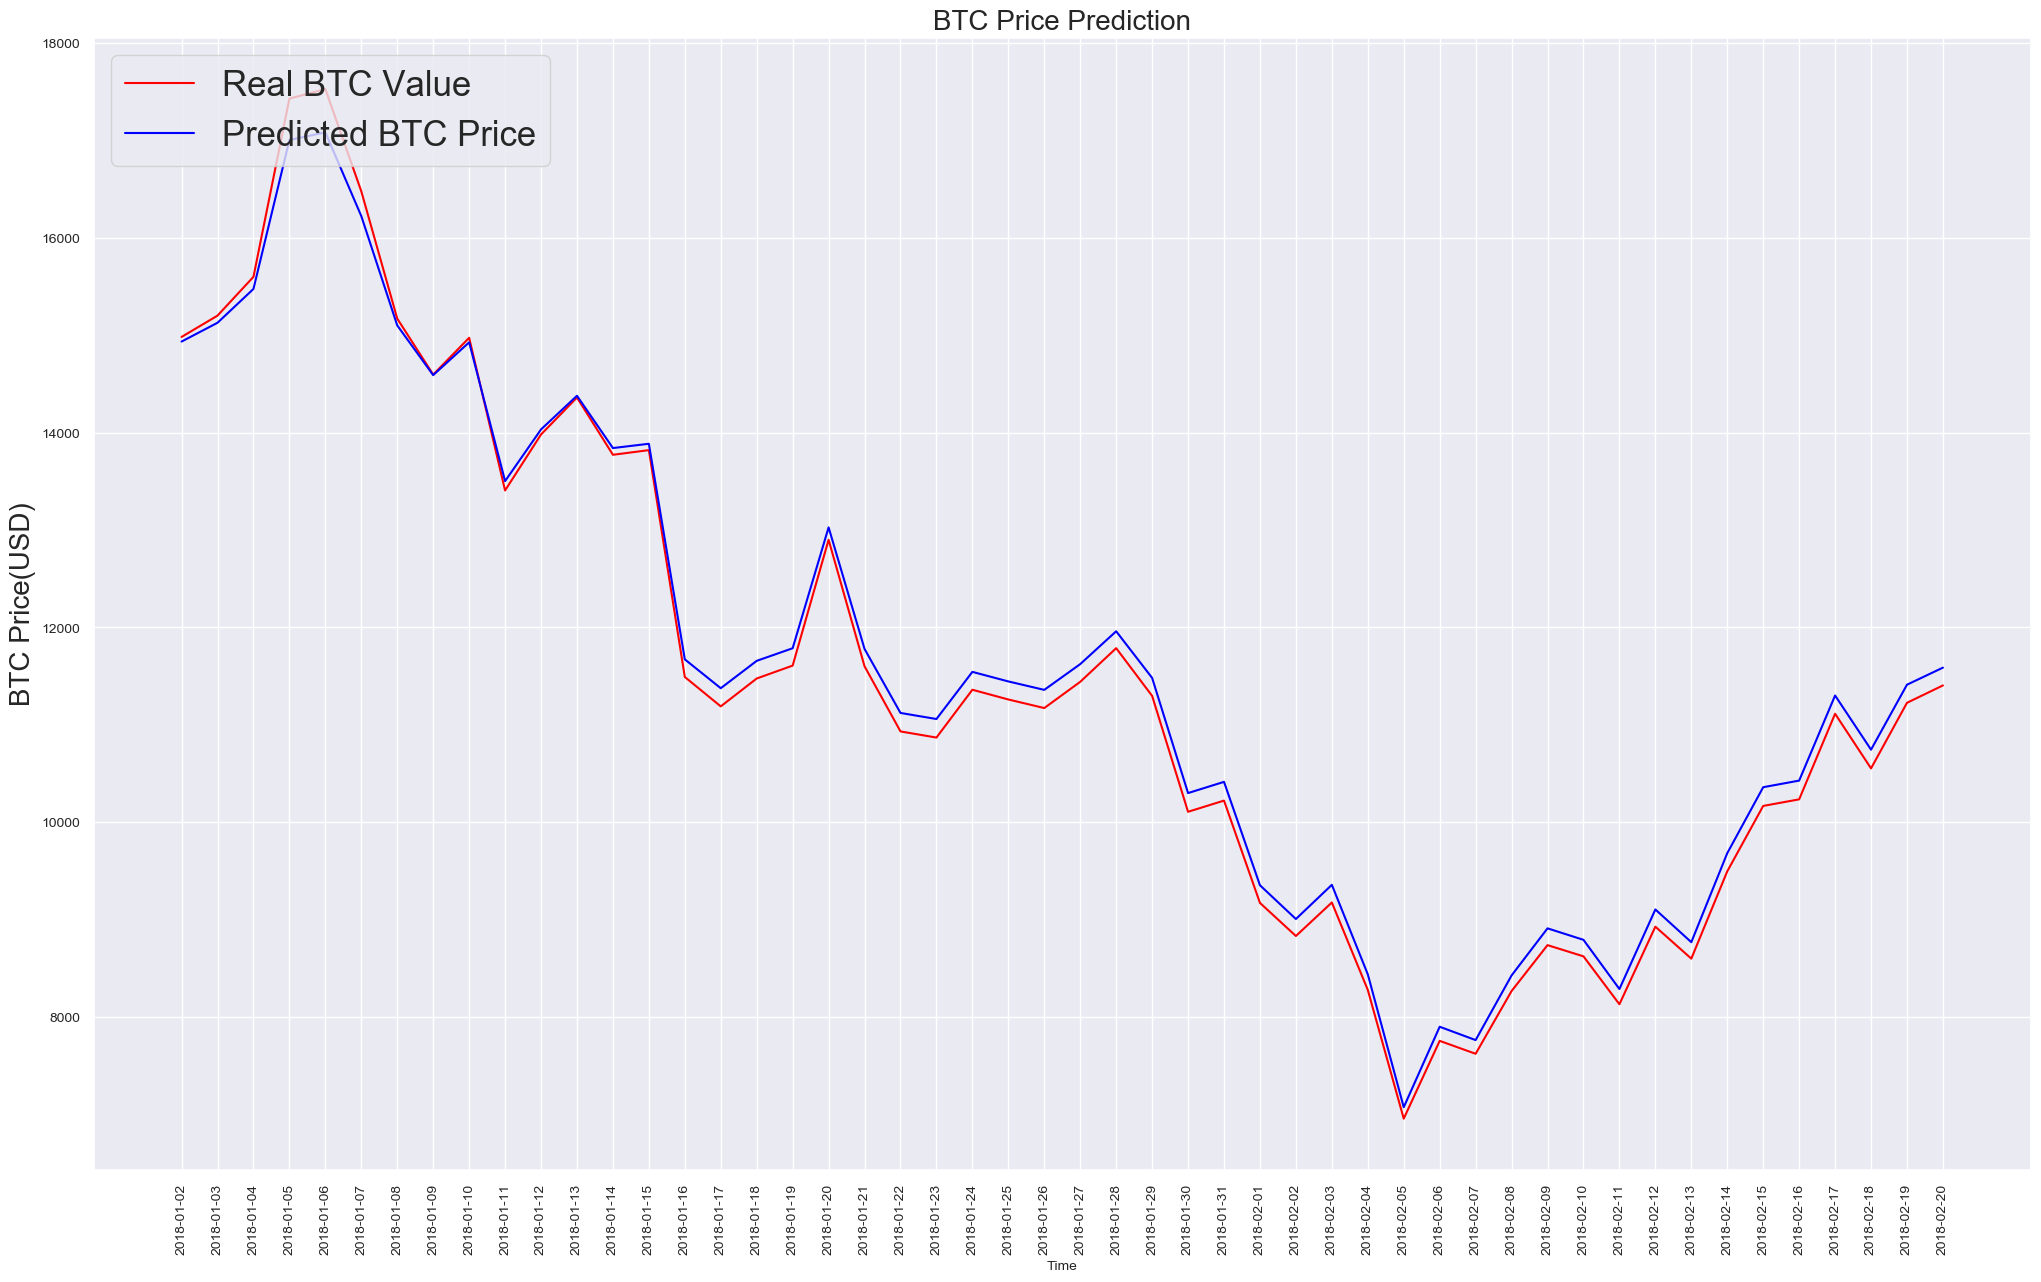

In [242]:
plt.figure(figsize=(25,15), dpi=100, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Value')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=20)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['Date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
plt.xlabel('Time', fontsize=10)
plt.ylabel('BTC Price(USD)', fontsize=20)
plt.legend(loc=2, prop={'size': 25})
plt.show()

In [244]:
predicted_BTC_price = predicted_BTC_price.ravel() 
TM_MSE = np.mean((predicted_BTC_price - df_test['Close']) ** 2)
rmse_lstm = sqrt(TM_MSE)

# Proposed Model

In [245]:
data = pd.read_csv('C:/Users/HP/Desktop/8TH Semester/Capstone/cryptocurrencypricehistory/bitcoin_price.csv')


data.isnull().values.any()

False

In [246]:
data.head(10)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",11231.80,11958.50,11231.80,11403.70,"9,926,540,000","189,536,000,000"
1,"Feb 19, 2018",10552.60,11273.80,10513.20,11225.30,"7,652,090,000","178,055,000,000"
2,"Feb 18, 2018",11123.40,11349.80,10326.00,10551.80,"8,744,010,000","187,663,000,000"
3,"Feb 17, 2018",10207.50,11139.50,10149.40,11112.70,"8,660,880,000","172,191,000,000"
4,"Feb 16, 2018",10135.70,10324.10,9824.82,10233.90,"7,296,160,000","170,960,000,000"
5,"Feb 15, 2018",9488.32,10234.80,9395.58,10166.40,"9,062,540,000","160,025,000,000"
6,"Feb 14, 2018",8599.92,9518.54,8599.92,9494.63,"7,909,820,000","145,023,000,000"
7,"Feb 13, 2018",8926.72,8958.47,8455.41,8598.31,"5,696,720,000","150,516,000,000"
8,"Feb 12, 2018",8141.43,8985.92,8141.43,8926.57,"6,256,440,000","137,258,000,000"
9,"Feb 11, 2018",8616.13,8616.13,7931.10,8129.97,"6,122,190,000","145,245,000,000"


In [247]:
data['Date'] = pd.to_datetime(data['Date']).dt.date
group = data.groupby('Date')
Daily_Price = group['Close'].mean()

In [248]:
Daily_Price.tail()

Date
2018-02-16    10233.9
2018-02-17    11112.7
2018-02-18    10551.8
2018-02-19    11225.3
2018-02-20    11403.7
Name: Close, dtype: float64

In [249]:
from datetime import date
df_train= Daily_Price[0:1408]
df_test= Daily_Price[1408:]

print(len(df_train), len(df_test))

1408 352


In [250]:
working_data = [df_train, df_test]
working_data = pd.concat(working_data)
        
working_data = working_data.reset_index()
working_data['Date'] = pd.to_datetime(working_data['Date'])
working_data = working_data.set_index('Date')

In [251]:
import statsmodels.api as sm
s = sm.tsa.seasonal_decompose(working_data.Close.values, freq=60)

In [252]:
trace1 = go.Scatter(x = np.arange(0, len(s.trend), 1),y = s.trend,mode = 'lines',name = 'Trend',
    line = dict(color = ('rgb(244, 146, 65)'), width = 4))
trace2 = go.Scatter(x = np.arange(0, len(s.seasonal), 1),y = s.seasonal,mode = 'lines',name = 'Seasonal',
    line = dict(color = ('rgb(66, 244, 155)'), width = 2))

trace3 = go.Scatter(x = np.arange(0, len(s.resid), 1),y = s.resid,mode = 'lines',name = 'Residual',
    line = dict(color = ('rgb(209, 244, 66)'), width = 2))

trace4 = go.Scatter(x = np.arange(0, len(s.observed), 1),y = s.observed,mode = 'lines',name = 'Observed',
    line = dict(color = ('rgb(66, 134, 244)'), width = 2))

data1 = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Seasonal decomposition', xaxis = dict(title = 'Time'), yaxis = dict(title = 'Price'))
fig = dict(data=data1, layout=layout)
py.iplot(fig, filename='seasonal_decomposition')

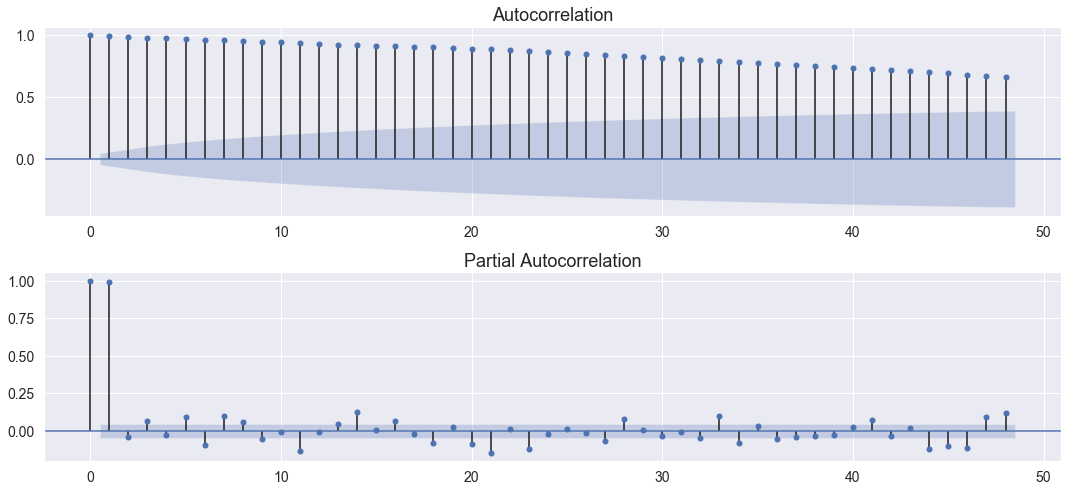

In [253]:
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(working_data.Close.values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(working_data.Close.values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

In [254]:
df_train = working_data[:-352]
df_test = working_data[-352:]

In [255]:
def create_lookback(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [256]:
from sklearn.preprocessing import MinMaxScaler

training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
test_set = df_test.values
test_set = np.reshape(test_set, (len(test_set), 1))

scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)
test_set = scaler.transform(test_set)

look_back = 1
X_train, Y_train = create_lookback(training_set, look_back)
X_test, Y_test = create_lookback(test_set, look_back)

X_train = np.reshape(X_train, (len(X_train), 1, X_train.shape[1]))
X_test = np.reshape(X_test, (len(X_test), 1, X_test.shape[1]))

In [257]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(256))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=100, batch_size=16, shuffle=False,
                    validation_data=(X_test, Y_test),
                    callbacks = [EarlyStopping(monitor='val_loss', min_delta=5e-5, patience=20, verbose=1)])


Train on 1407 samples, validate on 351 samples
Epoch 1/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0297 - val_loss: 5.2781
Epoch 2/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0144 - val_loss: 0.7765
Epoch 3/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0013 - val_loss: 1.1699
Epoch 4/100
1407/1407 [==============================] - 3s 2ms/step - loss: 6.3341e-04 - val_loss: 0.9263
Epoch 5/100
1407/1407 [==============================] - 3s 2ms/step - loss: 6.3840e-04 - val_loss: 0.9556
Epoch 6/100
1407/1407 [==============================] - 3s 2ms/step - loss: 6.0515e-04 - val_loss: 0.9452
Epoch 7/100
1407/1407 [==============================] - 3s 2ms/step - loss: 5.9157e-04 - val_loss: 1.0240
Epoch 8/100
1407/1407 [==============================] - 3s 2ms/step - loss: 5.6110e-04 - val_loss: 1.1914
Epoch 9/100
1407/1407 [==============================] - 3s 2ms/step - loss: 5.5917e-04 - val_loss: 1.4376
Ep

In [258]:
#Hi

In [259]:
X_test=X_test.reshape(-1,1)

arr=working_data.iloc[-1][0]
arr=arr.reshape(-1,1)

X_test = np.append(X_test, arr)

In [260]:
X_test = np.reshape(X_test, (len(X_test), 1, 1))

prediction = model.predict(X_test)
prediction_inverse = scaler.inverse_transform(prediction.reshape(-1, 1))
Y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1))
prediction2_inverse = np.array(prediction_inverse[:,0][1:])
Y_test2_inverse = np.array(Y_test_inverse[:,0])

In [261]:
#Hello

In [262]:
Test_Dates = Daily_Price[len(Daily_Price)-days_from_train:].index

trace1 = go.Scatter(x=Test_Dates, y=Y_test2_inverse, name= 'Actual Price',
                   line = dict(color = ('rgb(66, 244, 155)'),width = 2))
trace2 = go.Scatter(x=Test_Dates, y=prediction2_inverse, name= 'Predicted Price',
                   line = dict(color = ('rgb(244, 146, 65)'),width = 2))
data = [trace1, trace2]
layout = dict(title = 'Comparison of true prices (on the test dataset) with prices our model predicted, by dates',
             xaxis = dict(title = 'Date'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=data, layout=layout)
RMSE = sqrt(mean_squared_error(Y_test2_inverse, prediction2_inverse))
#rmse_mlstm=sqrt(rmse_mlstm*15)
py.iplot(fig, filename='results_demonstrating1')

In [263]:
def get_split(working_data, n_train, n_test, look_back = 1):
   
    start_point = randint(0, (len(working_data)-n_test-n_train))
    df_train = working_data[start_point:start_point+n_train]
    df_test = working_data[start_point+n_train:start_point+n_train+n_test]

    training_set = df_train.values
    training_set = np.reshape(training_set, (len(training_set), 1))
    test_set = df_test.values
    test_set = np.reshape(test_set, (len(test_set), 1))

 
    scaler_cv = MinMaxScaler()
    training_set = scaler_cv.fit_transform(training_set)
    test_set = scaler_cv.transform(test_set)

   
    X_train, Y_train = create_lookback(training_set, look_back)
    X_test, Y_test = create_lookback(test_set, look_back)

   
    X_train = np.reshape(X_train, (len(X_train), 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (len(X_test), 1, X_test.shape[1]))

    return X_train, Y_train, X_test, Y_test, scaler_cv, start_point


def train_model(X_train, Y_train, X_test, Y_test):
   
    model = Sequential()
    model.add(GRU(256, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))

    
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs = 100, batch_size = 16, shuffle = False,
                    validation_data=(X_test, Y_test), verbose=0,
                    callbacks = [EarlyStopping(monitor='val_loss',min_delta=5e-5,patience=20,verbose=0)])
    return model


def get_rmse(model, X_test, Y_test, scaler, start_point, working_data, n_train):
   
    arr1=working_data.iloc[start_point+n_train+len(X_test)][0]
    arr1=arr1.reshape(-1,1)
    X_test = np.append(X_test, arr1)
    X_test = np.reshape(X_test, (len(X_test), 1, 1))

    
    prediction = model.predict(X_test)
    prediction_inverse = scaler.inverse_transform(prediction.reshape(-1, 1))
    Y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1))
    prediction2_inverse = np.array(prediction_inverse[:,0][1:])
    Y_test2_inverse = np.array(Y_test_inverse[:,0])

   
    RMSE = sqrt(mean_squared_error(Y_test2_inverse, prediction2_inverse))
    return RMSE, prediction2_inverse

In [264]:
def workflow(working_data, get_split, train_model, get_rmse,n_train = 250,n_test = 50,look_back = 1):
    X_train, Y_train, X_test, Y_test, scaler, start_point = get_split(working_data, n_train, n_test)
    model = train_model(X_train, Y_train, X_test, Y_test)
    RMSE, predictions = get_rmse(model, X_test, Y_test, scaler, start_point, working_data, n_train)
    return RMSE, predictions

In [265]:
rmse_mlstm, predictions = workflow(working_data, get_split, train_model, get_rmse, n_train = 600,n_test = 352)

In [266]:
def cross_validate(working_data,get_split,train_model,get_rmse,workflow,n_train = 250,n_test = 50,look_back = 1):
    rmse_list = []
    for i in range(10):
        print('Iteration:', i+1)
        RMSE, _ = workflow(working_data, get_split, train_model, get_rmse, n_train, n_test, look_back)
        rmse_list.append(RMSE)
        print('Test RMSE: %.3f' % RMSE)
    mean_rmse = np.mean(rmse_list)
    return mean_rmse, rmse_list

In [267]:
mean_rmse, rmse_list = cross_validate(working_data, get_split, train_model, get_rmse, workflow)
print('Average RMSE: ', mean_rmse)
print('RMSE list:', rmse_list)

Iteration: 1
Test RMSE: 2327.452
Iteration: 2
Test RMSE: 1213.504
Iteration: 3
Test RMSE: 690.215
Iteration: 4
Test RMSE: 1331.479
Iteration: 5
Test RMSE: 1501.426
Iteration: 6
Test RMSE: 631.331
Iteration: 7
Test RMSE: 12798.701
Iteration: 8
Test RMSE: 973.776
Iteration: 9
Test RMSE: 2590.924
Iteration: 10
Test RMSE: 1817.577
Average RMSE:  2587.6385692861645
RMSE list: [2327.4518556717453, 1213.5043831609414, 690.2153588850498, 1331.478934225626, 1501.4264843752276, 631.3308869549594, 12798.70113080152, 973.7759690800822, 2590.9241415349616, 1817.5765481715327]


In [268]:
predictions.shape

(351,)

In [269]:
predictions_new = predictions - mean_rmse

RMSE_new = sqrt(mean_squared_error(Y_test2_inverse, predictions_new))

In [271]:
#Hello

In [272]:
rmse_lr

230.95331581866412

In [273]:
rmse_svr

231.49006424878547

In [274]:
rmse_arima

131.536191114954

In [275]:
rmse_lstm

179.67138103049308

In [276]:
rmse_mlstm

65.54782845348161

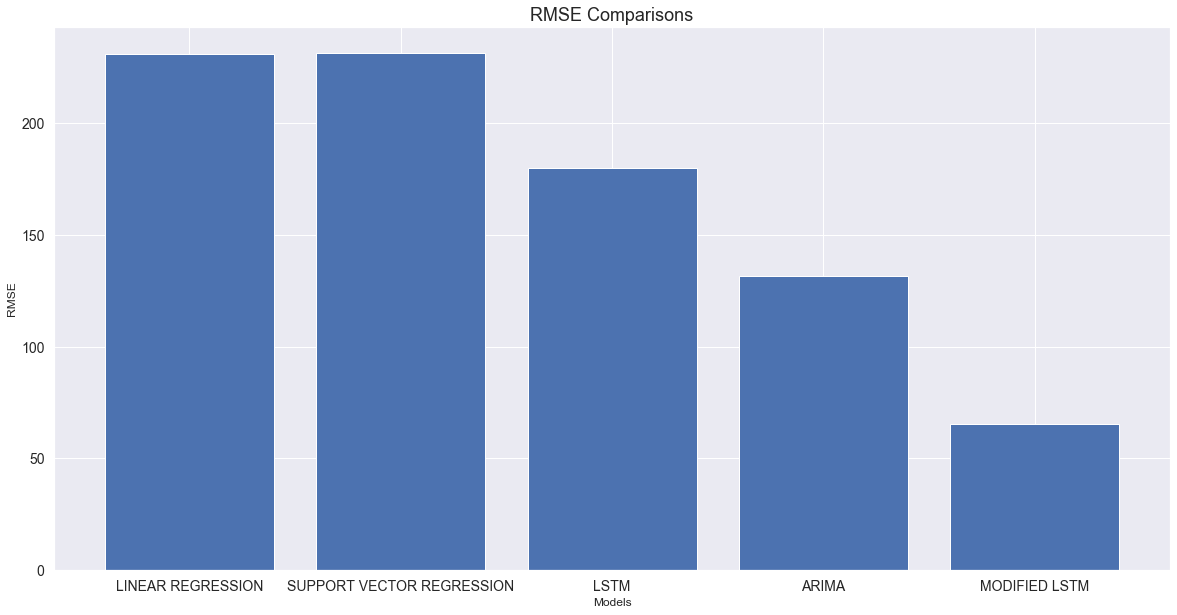

In [277]:
x = np.arange(5)
plt.bar(x, height=[rmse_lr,rmse_svr,rmse_lstm,rmse_arima,rmse_mlstm])
plt.xticks(x, ['LINEAR REGRESSION','SUPPORT VECTOR REGRESSION','LSTM','ARIMA','MODIFIED LSTM'])
plt.ylabel('RMSE')
plt.xlabel('Models')
plt.title("RMSE Comparisons");